# **Final Project Task 1 -Census Data Preprocess**

### Loading the data 

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [4]:
print(data.shape)
print(data.info)

(32561, 15)
<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Mal

### Handle missing values if any

In [6]:
print(data.isnull().sum()) # Checking missing values on each column 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
print(data.sample(n=20)) #The missing values are shown as "?"

       age         workclass  fnlwgt     education  education-num  \
4098    19           Private  430471          11th              7   
27997   35           Private   98986       7th-8th              4   
15773   63                 ?  156799       HS-grad              9   
30462   51           Private  161838     Assoc-voc             11   
20883   22           Private  157332  Some-college             10   
3436    38           Private  220585       HS-grad              9   
30537   35           Private  239409          10th              6   
20765   55           Private  223127           9th              5   
30418   45           Private  187033       HS-grad              9   
29479   33  Self-emp-not-inc  359428       HS-grad              9   
21335   43  Self-emp-not-inc  194726       HS-grad              9   
19928   53           Private  192386       HS-grad              9   
13684   42           Private  190786     Assoc-voc             11   
29256   50  Self-emp-not-inc  2136

In [8]:
data.replace('?', pd.NA, inplace=True) #Replaced "?" with NA
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [9]:
data['workclass'].value_counts() #Checking distinct values on the workclass column

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [10]:
# Count the occurrences of each unique value in the 'occupation' column.
data['occupation'].value_counts() #Checking distinct values on the occupation column

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [18]:
# Checking NaN values on workclass and occupation columns 
print(len(data[data['workclass'].isna()]))
print(len(data[data['occupation'].isna()]))
len(data[data['workclass'].isna() & data['occupation'].isna()])

1836
1843


1836

In [19]:
data[data['occupation'].isna() & ~data['workclass'].isna()]  # Checking rows where occupation is NaN, but workclass is populated to see if they are null rows 

age     workclass  fnlwgt     education  education-num  \
5361    18  Never-worked  206359          10th              6   
10845   23  Never-worked  188535       7th-8th              4   
14772   17  Never-worked  237272          10th              6   
20337   18  Never-worked  157131          11th              7   
23232   20  Never-worked  462294  Some-college             10   
32304   30  Never-worked  176673       HS-grad              9   
32314   18  Never-worked  153663  Some-college             10   

           marital-status occupation   relationship   race     sex  \
5361        Never-married       <NA>      Own-child  White    Male   
10845            Divorced       <NA>  Not-in-family  White    Male   
14772       Never-married       <NA>      Own-child  White    Male   
20337       Never-married       <NA>      Own-child  White  Female   
23232       Never-married       <NA>      Own-child  Black    Male   
32304  Married-civ-spouse       <NA>           Wife  Black  Female   
32314       Never-married       <NA>      Own-child  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
5361              0             0              40  United-States  <=50K  
10845             0             0              35  United-States  <=50K  
14772             0             0              30  United-States  <=50K  
20337             0             0              10  United-States  <=50K  
23232             0             0              40  United-States  <=50K  
32304             0             0              40  United-States  <=50K  
32314             0             0               4  United-States  <=50K

In [20]:
data.loc[data['occupation'].isna() & (data['workclass'] == 'Never-worked'), 'occupation'] = 'No-occupation' # Assigning no-occupation on the occupation column where workclass is declared as never-worked

In [21]:
print(data.isnull().sum()) # Checking missing values on each column

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1836
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [25]:
from sklearn.impute import SimpleImputer

# List columns with missing values
columns_with_na = ['workclass', 'occupation', 'native-country']

# Replace pd.NA with np.nan in the columns with missing values
data[columns_with_na] = data[columns_with_na].replace({pd.NA: np.nan})

# Replace missing values with most frecquent value
imputer = SimpleImputer(strategy='most_frequent')
data[columns_with_na] = imputer.fit_transform(data[columns_with_na])

In [26]:
# Checking for any null values left
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Encode data

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# Encode sex and income as binary data (Male - 1, Female  - 0, <=50K  - 0, >50K - 1)
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['income'] = label_encoder.fit_transform(data['income'])

# One-Hot Encoding for the categorial columns 
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [30]:
data.sample(n=10)

age  fnlwgt     education  education-num  sex  capital-gain  \
25067   18   71076       HS-grad              9    1             0   
15812   38  266325     Bachelors             13    0             0   
12605   56  212864     Bachelors             13    1             0   
32453   46   42251  Some-college             10    1             0   
13847   23  189017     Bachelors             13    1             0   
13719   24  193416  Some-college             10    0             0   
22117   39  255027     Assoc-voc             11    0             0   
19884   24  103064     Bachelors             13    0             0   
17420   57   47619    Assoc-acdm             12    0             0   
22590   39  103260     Bachelors             13    0             0   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
25067             0              40       0                False  ...   
15812             0              32       1                False  ...   
12605             0              40       1                False  ...   
32453             0              45       1                False  ...   
13847             0              55       0                False  ...   
13719             0              40       0                 True  ...   
22117             0              40       0                False  ...   
19884             0              40       0                False  ...   
17420             0              40       0                False  ...   
22590             0              30       1                False  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
25067                    False                       False   
15812                    False                       False   
12605                    False                       False   
32453                    False                       False   
13847                    False                       False   
13719                    False                       False   
22117                    False                       False   
19884                    False                       False   
17420                    False                       False   
22590                    False                       False   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
25067                    False                 False                  False   
15812                    False                 False                  False   
12605                    False                 False                  False   
32453                    False                 False                  False   
13847                    False                 False                  False   
13719                    False                 False                  False   
22117                    False                 False                  False   
19884                    False                 False                  False   
17420                    False                 False                  False   
22590                    False                 False                  False   

       native-country_Thailand  native-country_Trinadad&Tobago  \
25067                    False                           False   
15812                    False                           False   
12605                    False                           False   
32453                    False                           False   
13847                    False                           False   
13719                    False                           False   
22117                    False                           False   
19884                    False                           False   
17420                    False                           False   
22590                    False                           False   

       native-country_United-States  native-country_Vietnam  \
25067                          True                   False   
15812                     

### Correct errors, inconsistencies, remove duplicates if any

In [31]:
#Checking how many duplicates there are 
duplicates = data[data.duplicated()]
print(f"Number of duplicates: {len(duplicates)}")

Number of duplicates: 24


In [32]:
# Removing duplicates and inserting them into a new data frame 
data_no_duplic = data.drop_duplicates()
print(f"Shape after removing duplicates: {data_no_duplic.shape}")

Shape after removing duplicates: (32537, 85)


### Outlier detection and treatment if any

In [34]:
print(data.describe()) # Descriptive statistics for the data frame 

                age        fnlwgt  education-num           sex  capital-gain  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679      0.669205   1077.648844   
std       13.640433  1.055500e+05       2.572720      0.470506   7385.292085   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      1.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      1.000000      0.000000   
max       90.000000  1.484705e+06      16.000000      1.000000  99999.000000   

       capital-loss  hours-per-week        income  
count  32561.000000    32561.000000  32561.000000  
mean      87.303830       40.437456      0.240810  
std      402.960219       12.347429      0.427581  
min        0.000000        1.000000      0.000000  
25%        0.000000

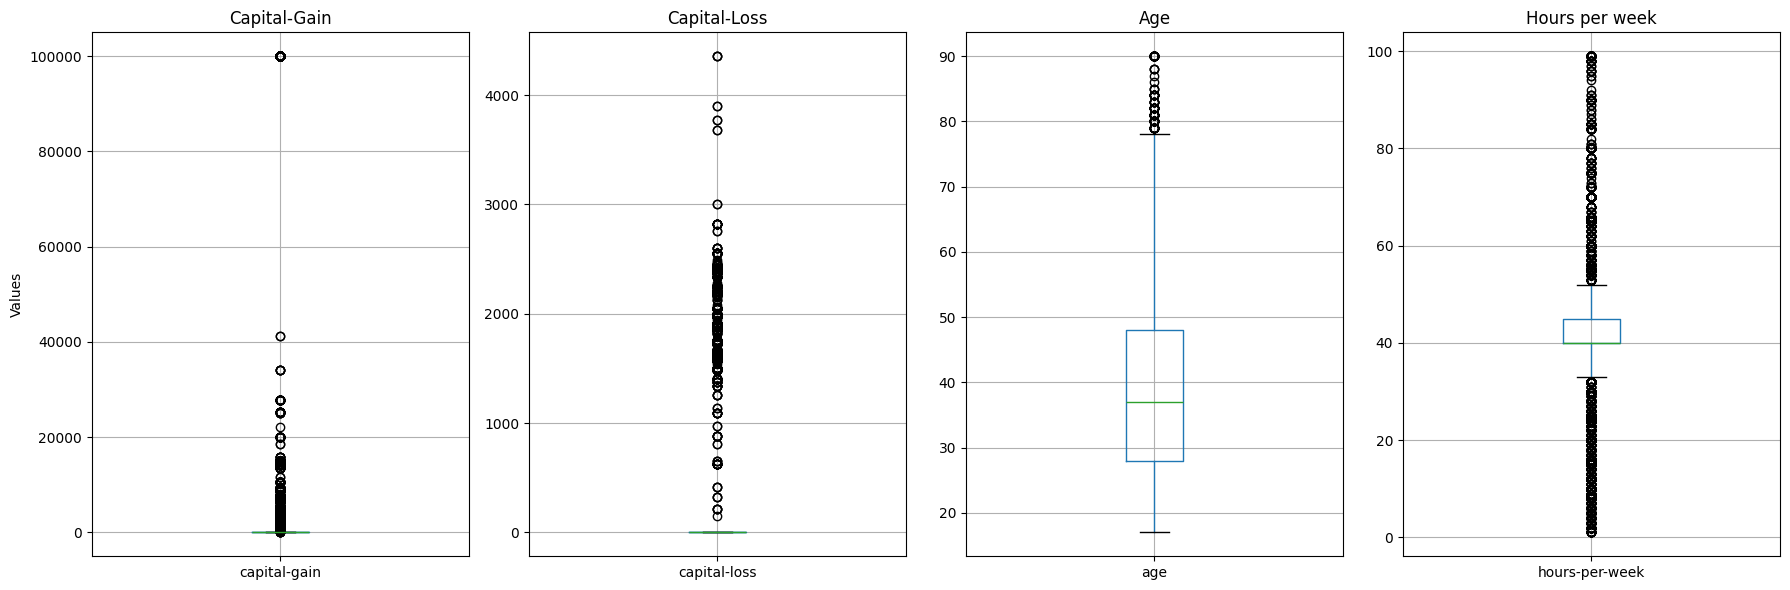

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=False)

# Create boxplots for each variable
data.boxplot(column='capital-gain', ax=axes[0])
axes[0].set_title('Capital-Gain')
axes[0].set_ylabel('Values')

data.boxplot(column='capital-loss', ax=axes[1])
axes[1].set_title('Capital-Loss')

data.boxplot(column='age', ax=axes[2])
axes[2].set_title('Age')

data.boxplot(column='hours-per-week', ax=axes[3])
axes[3].set_title('Hours per week')

# Adjust layout
plt.tight_layout()
plt.show()

In [36]:
# Check for rows with 'capital-loss' values exceeding the capped limit (3,000) to identify anomalies
print(data[data['capital-loss'] > 3000])

       age  fnlwgt     education  education-num  sex  capital-gain  \
5309    41   70037  Some-college             10    1             0   
8963    90   77053       HS-grad              9    0             0   
11902   34  216864       HS-grad              9    0             0   
12600   74   88638     Doctorate             16    0             0   
14756   82  132870       HS-grad              9    0             0   
15942   38  150601          10th              6    1             0   
20416   54  140359       7th-8th              4    0             0   
23054   68  422013       HS-grad              9    0             0   
23802   41  264663  Some-college             10    0             0   
30539   45  172274     Doctorate             16    0             0   
30781   66  186061  Some-college             10    0             0   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
5309           3004              60       1                False  ...   
8963         

In [37]:
# Count the cases where capital-loss > 3,000
num_cases_loss = data[data['capital-loss'] > 3000].shape[0]

print(f"The number of cases with capital-loss greater than 3,000 is: {num_cases_loss}")

The number of cases with capital-loss greater than 3,000 is: 11


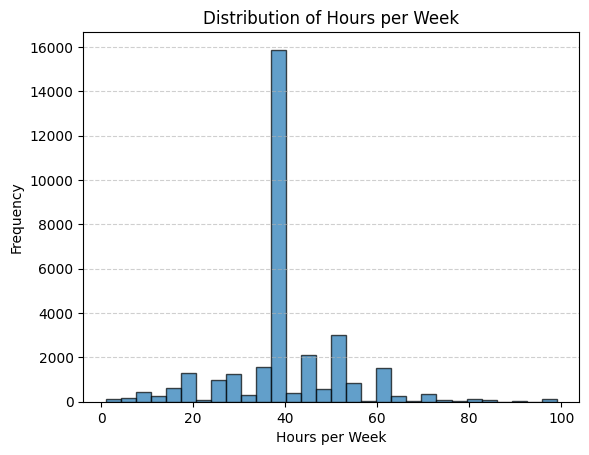

In [39]:
# Analyze hours-per-week column using a histogram
plt.hist(data['hours-per-week'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [40]:
# Check for rows where individuals report working only 1 hour per week to investigate potential anomalies
print(data[data['hours-per-week'] == 1])

       age  fnlwgt     education  education-num  sex  capital-gain  \
189     58  109567     Doctorate             16    1             0   
1036    66  150726           9th              5    1          1409   
1262    69  195779     Assoc-voc             11    0             0   
5590    78  363134       HS-grad              9    0             0   
5632    45  189564       Masters             14    0             0   
5766    62   97231  Some-college             10    0             0   
5808    76  211574          10th              6    1             0   
8447    67  244122     Assoc-voc             11    0             0   
9147    75  260543          10th              6    0             0   
11451   27  147951       HS-grad              9    1             0   
19337   72   76860       HS-grad              9    1             0   
19750   23   72887       HS-grad              9    1             0   
20072   65   76043       HS-grad              9    1             0   
20909   77   71676  

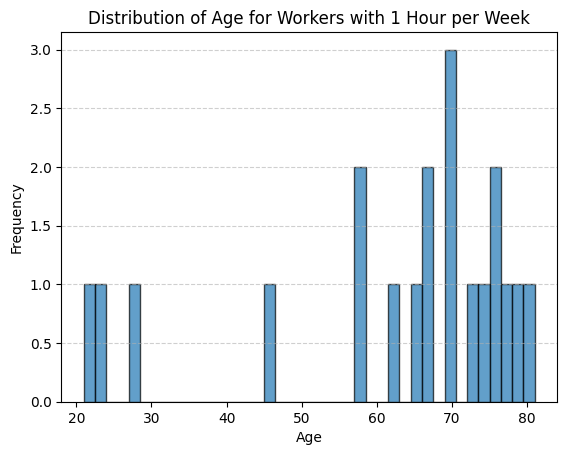

In [41]:
# Filter the cases where hours-per-week = 1
one_hour_workers = data[data['hours-per-week'] == 1]

# Create a histogram for the age variable
plt.hist(one_hour_workers['age'], bins=40, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age for Workers with 1 Hour per Week')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [42]:
# Check for individuals reporting 90 or more working hours per week to investigate extreme cases
print(data[data['hours-per-week'] >= 90])

       age  fnlwgt     education  education-num  sex  capital-gain  \
272     50   30653       Masters             14    1          2407   
935     37  176900       HS-grad              9    1             0   
1172    25  404616       Masters             14    1             0   
1417    31  179186     Bachelors             13    1             0   
1730    24  180060       Masters             14    1          6849   
...    ...     ...           ...            ...  ...           ...   
31681   43  266324       HS-grad              9    1             0   
31699   43  163108  Some-college             10    1             0   
31849   21  304602     Assoc-voc             11    1             0   
32469   58  181974     Doctorate             16    0             0   
32531   30   33811     Bachelors             13    0             0   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
272               0              98       0                False  ...   
935          

### Normalization / Standardization if necesarry

In [43]:
print(data.describe())

                age        fnlwgt  education-num           sex  capital-gain  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679      0.669205   1077.648844   
std       13.640433  1.055500e+05       2.572720      0.470506   7385.292085   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      1.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      1.000000      0.000000   
max       90.000000  1.484705e+06      16.000000      1.000000  99999.000000   

       capital-loss  hours-per-week        income  
count  32561.000000    32561.000000  32561.000000  
mean      87.303830       40.437456      0.240810  
std      402.960219       12.347429      0.427581  
min        0.000000        1.000000      0.000000  
25%        0.000000

In [44]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataset for keeping the original data
data_normalized = data.copy()

# Normalize the numeric columns to a uniform range (0-1) to ensure consistent feature scaling
numeric_columns = ['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
data_normalized[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [45]:
# Descriprive statistics for the original dataset
print(data[numeric_columns].describe())

             fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
count  3.256100e+04   32561.000000  32561.000000  32561.000000    32561.000000
mean   1.897784e+05      10.080679   1077.648844     87.303830       40.437456
std    1.055500e+05       2.572720   7385.292085    402.960219       12.347429
min    1.228500e+04       1.000000      0.000000      0.000000        1.000000
25%    1.178270e+05       9.000000      0.000000      0.000000       40.000000
50%    1.783560e+05      10.000000      0.000000      0.000000       40.000000
75%    2.370510e+05      12.000000      0.000000      0.000000       45.000000
max    1.484705e+06      16.000000  99999.000000   4356.000000       99.000000


In [46]:
# Descriptive statistics for the normalized dataset
print(data_normalized[numeric_columns].describe())

             fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
count  3.256100e+04   3.256100e+04  3.256100e+04  3.256100e+04    3.256100e+04
mean  -1.001625e-16   1.471887e-16  1.309314e-17  1.016900e-16   -1.549355e-17
std    1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00    1.000015e+00
min   -1.681631e+00  -3.529656e+00 -1.459205e-01 -2.166595e-01   -3.194030e+00
25%   -6.816910e-01  -4.200596e-01 -1.459205e-01 -2.166595e-01   -3.542945e-02
50%   -1.082193e-01  -3.136003e-02 -1.459205e-01 -2.166595e-01   -3.542945e-02
75%    4.478765e-01   7.460392e-01 -1.459205e-01 -2.166595e-01    3.695194e-01
max    1.226856e+01   2.300838e+00  1.339458e+01  1.059351e+01    4.742967e+00


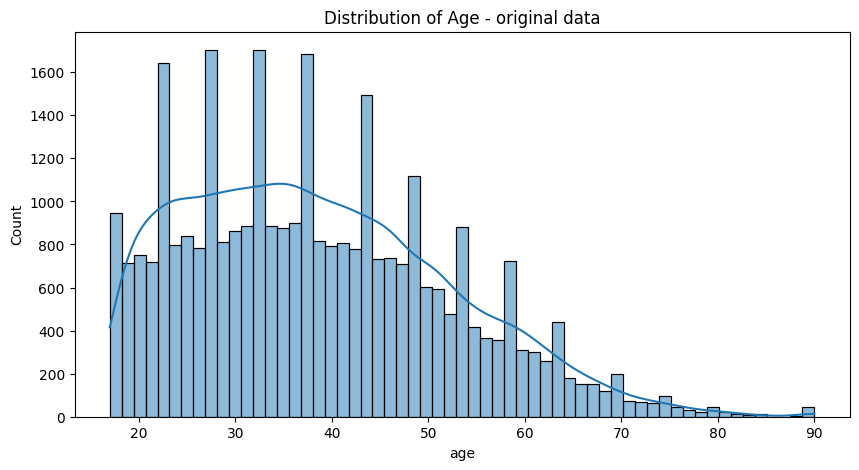

In [47]:
# Visualize the distribution of 'age' feature, before and after normalization to identify its range, skewness 
plt.figure(figsize=(10, 5))

# Original distribution
sns.histplot(data['age'], kde=True)
plt.title("Distribution of Age - original data")

plt.show()

In [48]:
# Display the correlation matrix to identify linear relationships between features.

# Remove non-numeric 'education' column and keep 'education-num'
numeric_data = data_normalized.drop(columns=['education']).select_dtypes(include=['float64', 'int64'])

# Calculate and display the correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                     age    fnlwgt  education-num       sex  capital-gain  \
age             1.000000 -0.076646       0.036527  0.088832      0.077674   
fnlwgt         -0.076646  1.000000      -0.043195  0.026858      0.000432   
education-num   0.036527 -0.043195       1.000000  0.012280      0.122630   
sex             0.088832  0.026858       0.012280  1.000000      0.048480   
capital-gain    0.077674  0.000432       0.122630  0.048480      1.000000   
capital-loss    0.057775 -0.010252       0.079923  0.045567     -0.031615   
hours-per-week  0.068756 -0.018768       0.148123  0.229309      0.078409   
income          0.234037 -0.009463       0.335154  0.215980      0.223329   

                capital-loss  hours-per-week    income  
age                 0.057775        0.068756  0.234037  
fnlwgt             -0.010252       -0.018768 -0.009463  
education-num       0.079923        0.148123  0.335154  
sex                 0.045567        0.229309  0.215980  
capital-gain       -0

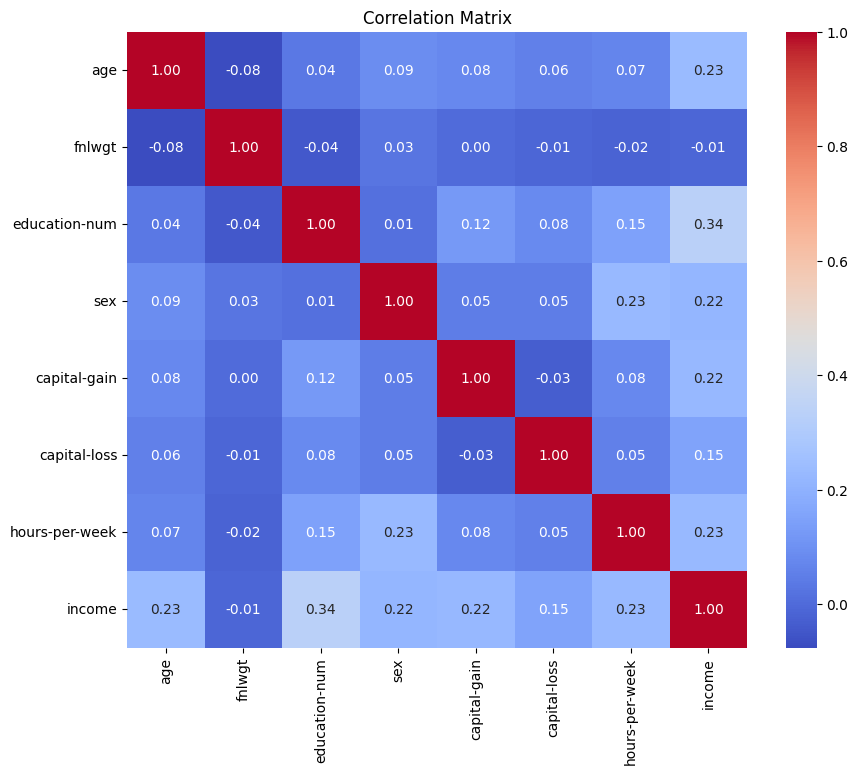

In [49]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Feature engineering

In [50]:
data_normalized.sample(n=10)

age    fnlwgt     education  education-num  sex  capital-gain  \
5437    45 -0.958938  Some-college      -0.031360    1      0.895083   
1702    24  0.730922  Some-college      -0.031360    1     -0.145920   
19714   19 -0.765274  Some-college      -0.031360    0     -0.145920   
22629   47  0.584847       HS-grad      -0.420060    0     -0.145920   
20560   39  2.196667  Some-college      -0.031360    0     -0.145920   
23274   41  0.598850  Some-college      -0.031360    1     -0.145920   
32306   24  2.254016       1st-4th      -3.140957    1     -0.145920   
17534   43 -1.280620       HS-grad      -0.420060    1     -0.145920   
18671   45  0.804471          10th      -1.586158    1     -0.145920   
30153   30  0.346928       HS-grad      -0.420060    0     -0.145920   

       capital-loss  hours-per-week  income  workclass_Local-gov  ...  \
5437       -0.21666       -0.035429       1                False  ...   
1702       -0.21666       -0.035429       0                False  ...   
19714      -0.21666       -0.035429       0                False  ...   
22629      -0.21666       -0.359389       0                False  ...   
20560      -0.21666       -0.845327       0                False  ...   
23274      -0.21666        0.612489       1                False  ...   
32306      -0.21666       -0.035429       0                False  ...   
17534      -0.21666        1.584366       0                False  ...   
18671      -0.21666        1.584366       0                False  ...   
30153      -0.21666       -0.845327       0                False  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
5437                     False                       False   
1702                     False                       False   
19714                    False                       False   
22629                    False                       False   
20560                    False                       False   
23274                    False                       False   
32306                    False                       False   
17534                    False                       False   
18671                    False                       False   
30153                    False                       False   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
5437                     False                 False                  False   
1702                     False                 False                  False   
19714                    False                 False                  False   
22629                    False                 False                  False   
20560                    False                 False                  False   
23274                    False                 False                  False   
32306                    False                 False                  False   
17534                    False                 False                  False   
18671                    False                 False                  False   
30153                    False                 False                  False   

       native-country_Thailand  native-country_Trinadad&Tobago  \
5437                     False                           False   
1702                     False                           False   
19714                    False                           False   
22629                    False                           False   
20560                    False                           False   
23274                    False                           False   
32306                    False                           False   
17534                    False                           False   
18671                    False                           False   
30153                    False                           False   

       native-country_United-States  native-country_Vietnam  \
5437                           True                   False   
1702

In [51]:
# Bins creation
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data_normalized['age_bin'] = pd.cut(data_normalized['age'], bins=bins, labels=labels)

# Display the first rows for cheching the binning creation
print(data_normalized[['age', 'age_bin']].head(10))

   age age_bin
0   39   35-44
1   50   45-54
2   38   35-44
3   53   45-54
4   28   25-34
5   37   35-44
6   49   45-54
7   52   45-54
8   31   25-34
9   42   35-44


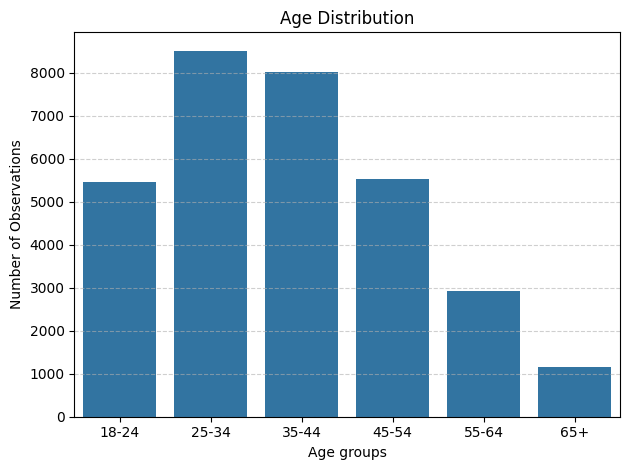

In [52]:
# Create a countplot for the 'age_bin' variable
sns.countplot(x='age_bin', data=data_normalized)

# Add a title and labels in English
plt.title('Age Distribution')
plt.xlabel('Age groups')
plt.ylabel('Number of Observations')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [53]:
data_normalized.head(10)

age    fnlwgt  education  education-num  sex  capital-gain  capital-loss  \
0   39 -1.063611  Bachelors       1.134739    1      0.148453      -0.21666   
1   50 -1.008707  Bachelors       1.134739    1     -0.145920      -0.21666   
2   38  0.245079    HS-grad      -0.420060    1     -0.145920      -0.21666   
3   53  0.425801       11th      -1.197459    1     -0.145920      -0.21666   
4   28  1.408176  Bachelors       1.134739    0     -0.145920      -0.21666   
5   37  0.898201    Masters       1.523438    0     -0.145920      -0.21666   
6   49 -0.280358        9th      -1.974858    0     -0.145920      -0.21666   
7   52  0.188195    HS-grad      -0.420060    1     -0.145920      -0.21666   
8   31 -1.364279    Masters       1.523438    0      1.761142      -0.21666   
9   42 -0.287350  Bachelors       1.134739    1      0.555214      -0.21666   

   hours-per-week  income  workclass_Local-gov  ...  \
0       -0.035429       0                False  ...   
1       -2.222153       0                False  ...   
2       -0.035429       0                False  ...   
3       -0.035429       0                False  ...   
4       -0.035429       0                False  ...   
5       -0.035429       0                False  ...   
6       -1.979184       0                False  ...   
7        0.369519       1                False  ...   
8        0.774468       1                False  ...   
9       -0.035429       1                False  ...   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                       False                    False                 False   
1                       False                    False                 False   
2                       False                    False                 False   
3                       False                    False                 False   
4                       False                    False                 False   
5                       False                    False                 False   
6                       False                    False                 False   
7                       False                    False                 False   
8                       False                    False                 False   
9                       False                    False                 False   

   native-country_Taiwan  native-country_Thailand  \
0                  False                    False   
1                  False                    False   
2                  False                    False   
3                  False                    False   
4                  False                    False   
5                  False                    False   
6                  False                    False   
7                  False                    False   
8                  False                    False   
9                  False                    False   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                           False                          True   
1                           False                          True   
2                           False                          True   
3                           False                          True   
4                           False                         False   
5                           False                          True   
6                           False                         False   
7                           False                          True   
8                           False                          True   
9                           False                          True   

   native-country_Vietnam  native-country_Yugoslavia  age_bin  
0                   False                      False    35-44  
1                   False                      False    45-54  
2                   False                      False    35-44  
3                   False                      False    45-54  
4   

In [55]:
# Save the DataFrame to a CSV file.
# 'data.csv' is the name of the output file.
data_normalized.to_csv("data_normalized.csv", index = False, encoding= "utf-8")